<a href="https://colab.research.google.com/github/Bala-Subramanian-G/Data-Analysis-using-Python/blob/main/KYC%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KYC analysis** of Internship students.

This dataset has been created using the google form response of students who were applying for internship at Senchola University.

Note: Since it is the realtime data i.e data of actual people. It's not good to show the details of real data as it may not be safe. So I just make some alterations like removing some sensitive columns like address and shuffling the datas in some other columns as well.

Note: Output of charts that are created with plotly library is not visible in Github. So Kindly run this notebook in Google Colab to be able to preview those outputs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [3]:
#Reading the dataset

df = pd.read_excel('/content/drive/MyDrive/Practice Datasets/Task-4 batch 1 application.xlsx')

In [4]:
# Checking the columns present in the dataset
df.columns

Index(['Date', 'Time', 'Open to learn?', 'Purpose of joining?', 'Have laptop?',
       'Name', 'Gender', 'Address', 'Qualification', 'Degree', 'Branch', 'YOP',
       'College Name', 'City', 'State', 'Domain', 'Comments',
       'Confidence Rating', 'Status'],
      dtype='object')

In [5]:
del df['Address']       # Deleting the address column
del df['College Name']  # Deleting the College name column

In [6]:
# Shuffling the Name and Gender Column together
df[['Name','Gender']] = df[['Name','Gender']].sample(frac=1).reset_index(drop=True)

# Shuffling the Qualification, Degree and Branch Column together
df[['Qualification', 'Degree', 'Branch']] = df[['Qualification', 'Degree', 'Branch']].sample(frac=1).reset_index(drop=True)

In [7]:
df.head(4)

,Date,Time,Open to learn?,Purpose of joining?,Have laptop?,Name,Gender,Qualification,Degree,Branch,YOP,City,State,Domain,Comments,Confidence Rating,Status
0,2023-04-04,06:48:39,Yes,To upgrade my skills,Yes,VENKATESH .P,Male,Engineering,B.E,Data Not Entered,2021,Perambalur,Tamilnadu,UI/UX Design,She doing course in chennai for QA. She lookin...,6,Next Batch
1,2023-04-05,11:24:40,Yes,I need to learn more skills about technology,Yes,MUGEETH,Male,Arts & Science,BCA,Bachelors Of Computer Application,2023,Tirunelveli,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered,Data Not Entered
2,2023-04-04,10:41:49,Maybe,I have internship in the month of April to Jun...,Yes,DHARANI DHARAN,Male,Arts & Science,B.Com,General,2023,Namakkal,Tamilnadu,HR/Admin,Data Not Entered,Data Not Entered,Data Not Entered
3,2023-04-04,09:16:33,Yes,I am persuing my MSW in Hr. An additional inte...,Yes,UGENDHAR .U,Male,Engineering,B.E,Civil Engineering,2023,Chennai,Tamilnadu,HR/Admin,did english litrature. did intership. english ...,9,We can try


In [8]:
# Removing some unwanted columns which are irrelevant to KYC Analysis

df.drop(['Purpose of joining?','Comments'], axis=1,inplace=True)

In [9]:
df.head()

,Date,Time,Open to learn?,Have laptop?,Name,Gender,Qualification,Degree,Branch,YOP,City,State,Domain,Confidence Rating,Status
0,2023-04-04,06:48:39,Yes,Yes,VENKATESH .P,Male,Engineering,B.E,Data Not Entered,2021,Perambalur,Tamilnadu,UI/UX Design,6,Next Batch
1,2023-04-05,11:24:40,Yes,Yes,MUGEETH,Male,Arts & Science,BCA,Bachelors Of Computer Application,2023,Tirunelveli,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered
2,2023-04-04,10:41:49,Maybe,Yes,DHARANI DHARAN,Male,Arts & Science,B.Com,General,2023,Namakkal,Tamilnadu,HR/Admin,Data Not Entered,Data Not Entered
3,2023-04-04,09:16:33,Yes,Yes,UGENDHAR .U,Male,Engineering,B.E,Civil Engineering,2023,Chennai,Tamilnadu,HR/Admin,9,We can try
4,2023-04-19,11:36:46,Yes,Yes,GOKULKRISHNAN .B,Male,Arts & Science,B.Com,Corporate Secretaryship,2021,Hosur,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered


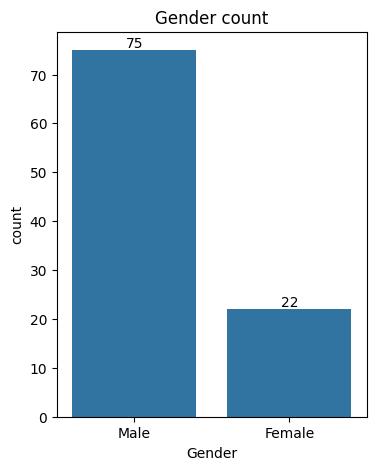

In [10]:
plt.figure(figsize=(4,5))
x=sns.countplot(df,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count")
plt.show()

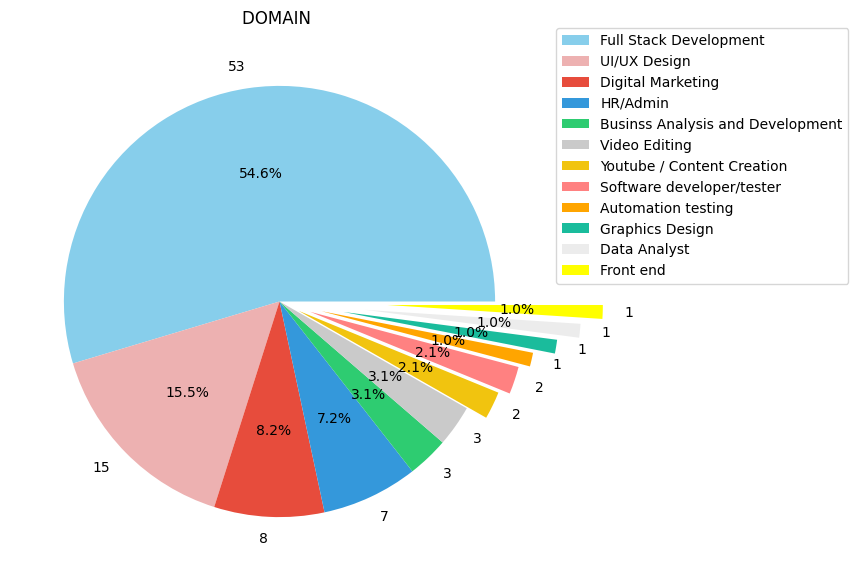

In [11]:
x=df['Domain'].value_counts()
my_explode=[0,0,0,0,0,0,0.1,.15,.2,.3,.4,.5]
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%', explode= my_explode,
        colors= ['#87CEEB','#EDB1B1','#E74C3C', '#3498DB','#2ECC71','#CACACA'
        ,'#F1C40F','#FF8181','orange','#1ABC9C','#ECECEC','yellow'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('DOMAIN ')
plt.show()

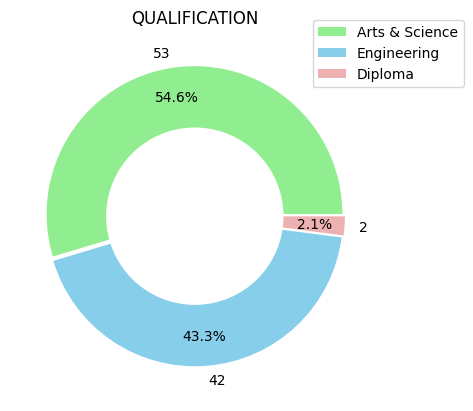

In [12]:
x=df['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1'],
        pctdistance=0.80, explode=[.015,.015,.015])

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8,1.05))
plt.title('QUALIFICATION')
plt.show()

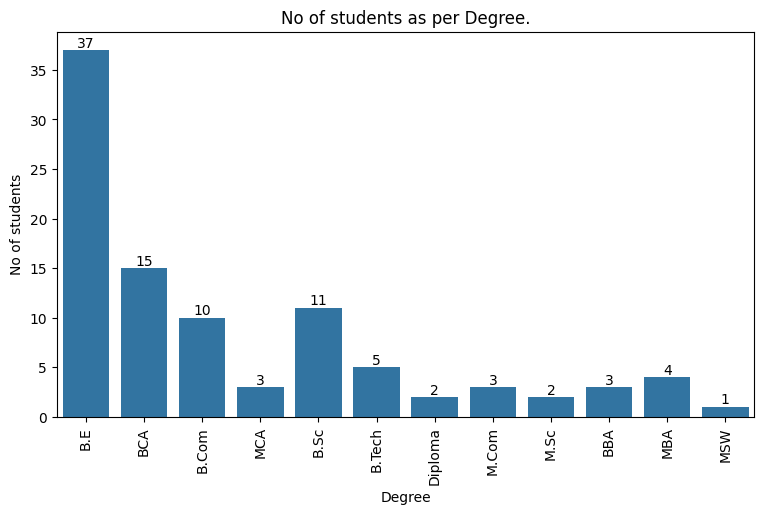

In [13]:
deg = df[df['Degree']!='Data Not Entered']
plt.figure(figsize=(9,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

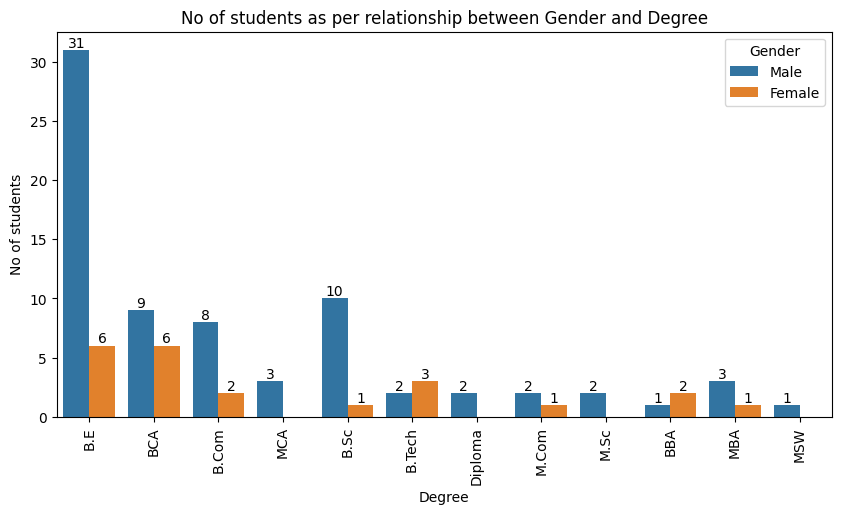

In [14]:
plt.figure(figsize=(10,5))
x=sns.countplot(data = deg, x ='Degree',hue='Gender')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per relationship between Gender and Degree")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

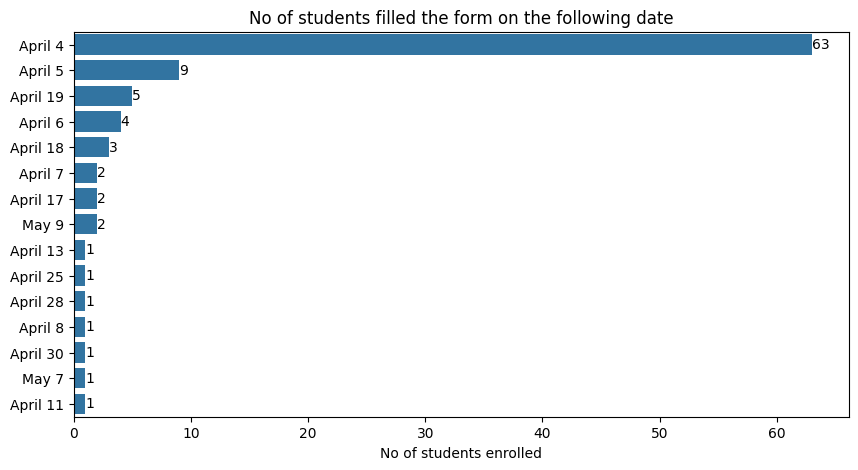

In [15]:
date_label=df['Date']  # df['Date'] is a Timestamp column
def date_in_words(s):
  date=s.day
  if s.month==4:
    month='April '
  else:
    month='May '
  return month+str(date)

date_label=date_label.apply(date_in_words)

date_in_words = pd.DataFrame({'date': date_label.unique(),
                     'students': date_label.value_counts().values})

plt.figure(figsize=(10,5))
fig = sns.barplot(data = date_in_words, x = 'students', y = 'date')

for i in fig.containers:
    fig.bar_label(i)
plt.xlabel("No of students enrolled")
plt.ylabel("")
plt.title("No of students filled the form on the following date")
plt.show(fig)

In [16]:
x=df['City'].value_counts().head()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=600, height=600,
                  title="STUDENTS FROM TOP 5 CITIES",
                  title_x=0.5, title_y=0.9, font=dict(size=16))
fig.show()

In [17]:
lap=df['Have laptop?'].value_counts()

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=lap[0],
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': f"Students having laptop out of {df.shape[0]}"},
    gauge={'axis': {'range': [0, 100], 'dtick': 5},
           'threshold': {'line': {'color': "red", 'width': 4},
                         'thickness': 0.75, 'value': 97}}
))
fig.update_layout(width=600, height=600)
fig.show()

In [18]:
degree_5=df['Degree'].value_counts().head()

fig = go.Figure(go.Funnel(y = degree_5.axes[0], x = degree_5.values))
fig.update_layout(width=700,height=500,
                  title="No of Students enrolled from Degree (top-5)",
                  title_x=0.5, title_y=0.9)
fig.show()

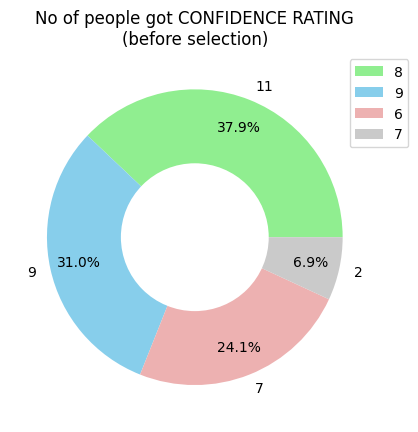

In [19]:
x=df['Confidence Rating'].value_counts().tail().head(4)

plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1','#CACACA'],
        pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('No of people got CONFIDENCE RATING\n(before selection)')
plt.show()

#SELECTED STUDENTS VISUALISATION#

In [20]:
df_selected = df[df.Status=='Selected']

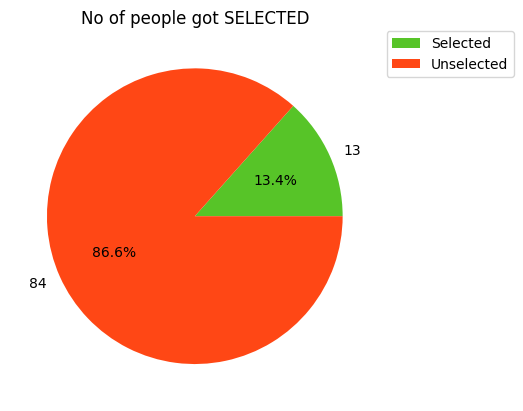

In [21]:
selected=df_selected.shape[0]
unselected=df.shape[0]-df_selected.shape[0]
x=[selected,unselected]
plt.pie(x, labels=x, autopct='%0.1f%%',
        colors=['#57C428','#FF4715'])
plt.legend(['Selected','Unselected'], loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('No of people got SELECTED')
plt.show()

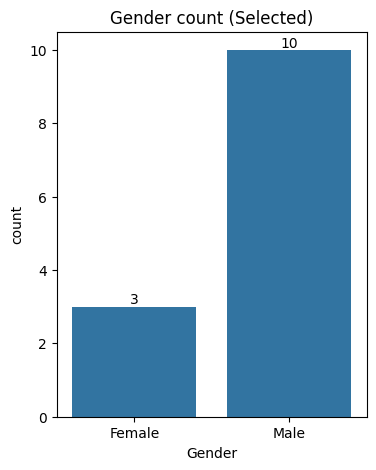

In [22]:
plt.figure(figsize=(4,5))
x=sns.countplot(df_selected,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count (Selected)")
plt.show()

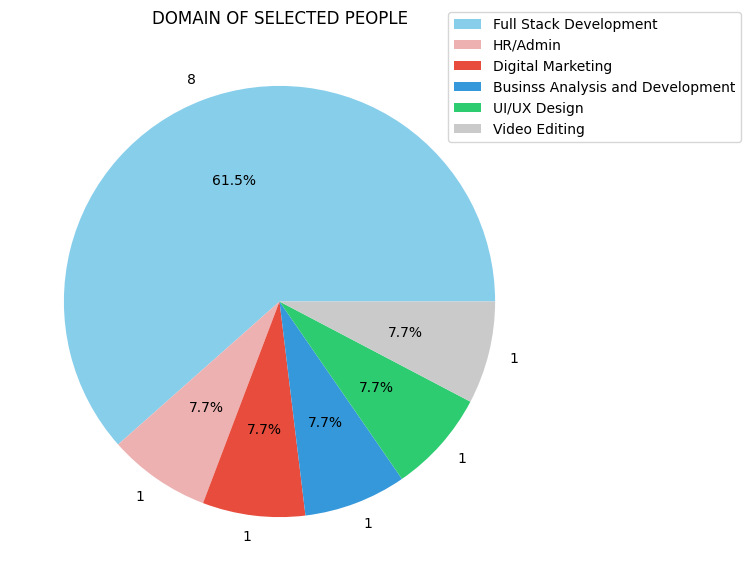

In [23]:
x=df_selected['Domain'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors= ['#87CEEB','#EDB1B1','#E74C3C',
                 '#3498DB','#2ECC71','#CACACA','#F1C40F'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8, 1.05))
plt.title('DOMAIN OF SELECTED PEOPLE')
plt.show()

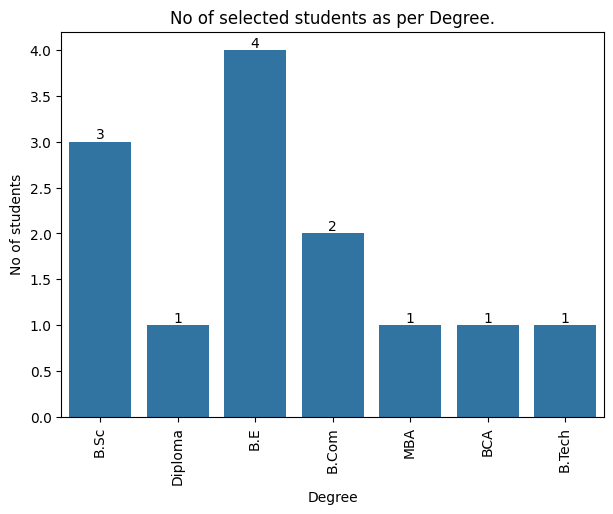

In [24]:
deg=df_selected[df_selected['Degree']!='Data Not Entered']
plt.figure(figsize=(7,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of selected students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

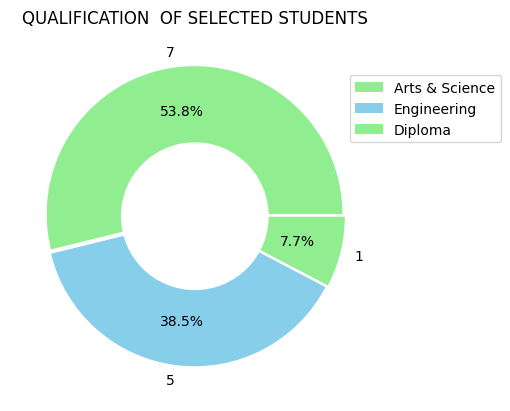

In [27]:
x=df_selected['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB'],
        pctdistance=0.70, explode=[.015,.015,.015])

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(0.9,0.9))
plt.title('QUALIFICATION  OF SELECTED STUDENTS')
plt.show()

In [28]:
x=df_selected['City'].value_counts()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=700,height=700,
                  title="CITIES OF SELECTED STUDENTS",
                  title_x=0.5, title_y=0.9,
                  font=dict(size=14))
fig.show()

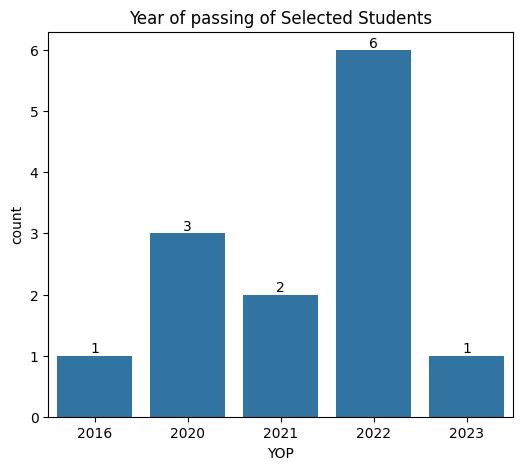

In [29]:
plt.figure(figsize=(6,5))
x=sns.countplot(df_selected,x='YOP')
for i in x.containers:
  x.bar_label(i)
plt.title("Year of passing of Selected Students")
plt.show()